<a href="https://colab.research.google.com/github/Region071/Time-series/blob/main/%D0%94%D0%BE%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0%20%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D0%BE_%D1%82%D0%B5%D0%BC%D0%B5_%C2%AB%D0%AD%D0%BB%D0%B5%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%80%D0%BD%D1%8B%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2%C2%BB_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Задание 1

import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Функция для теста на стационарность
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [3]:
# Функция для визуализации и анализа временного ряда
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    plt.show()

In [4]:
# Загрузка данных
files = [
    "/content/drive/MyDrive/daily-total-female-births-in-cal.csv",
    "/content/drive/MyDrive/international-airline-passengers.csv",
    "/content/drive/MyDrive/mean-monthly-air-temperature-deg.csv",
    "/content/drive/MyDrive/monthly-boston-armed-robberies-j.csv",
    "/content/drive/MyDrive/monthly-sales-of-company-x-jan-6.csv",
    "/content/drive/MyDrive/weekly-closings-of-the-dowjones-.csv"
]

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


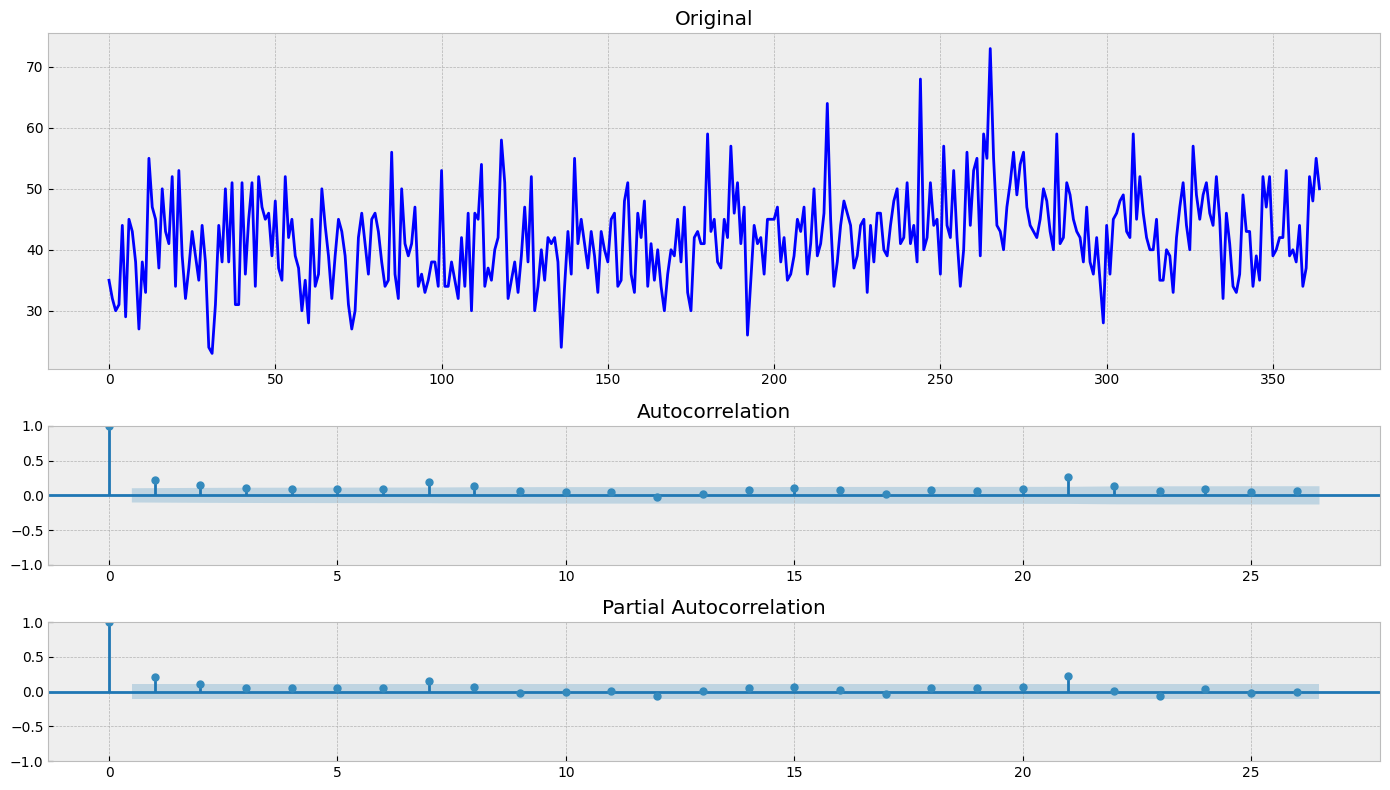

Results of Dickey-Fuller Test:
Test Statistic                  -4.353173
p-value                          0.000359
#Lags Used                       7.000000
Number of Observations Used    357.000000
Critical Value (1%)             -3.448801
Critical Value (5%)             -2.869670
Critical Value (10%)            -2.571101
dtype: float64


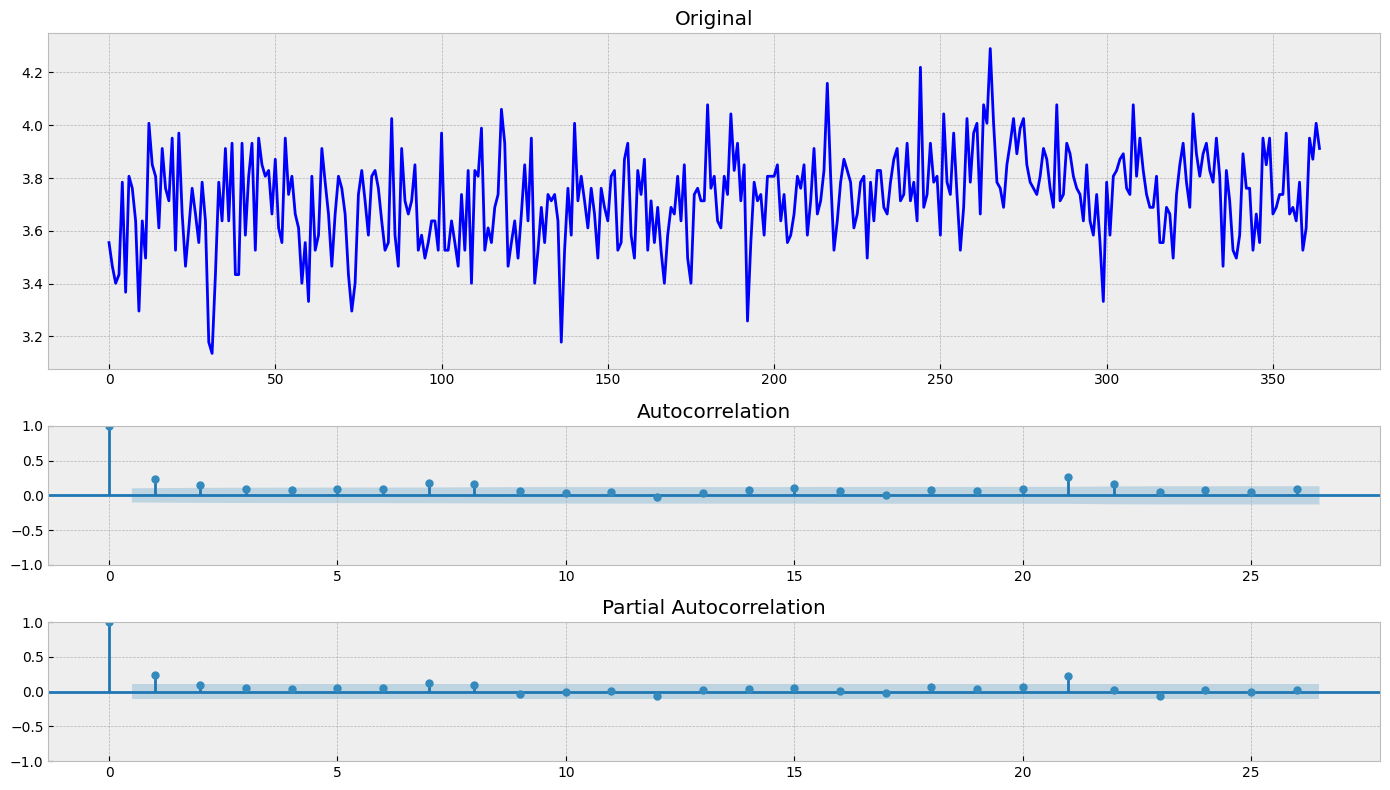

Results of Dickey-Fuller Test:
Test Statistic                -1.296334e+01
p-value                        3.191205e-24
#Lags Used                     6.000000e+00
Number of Observations Used    3.570000e+02
Critical Value (1%)           -3.448801e+00
Critical Value (5%)           -2.869670e+00
Critical Value (10%)          -2.571101e+00
dtype: float64


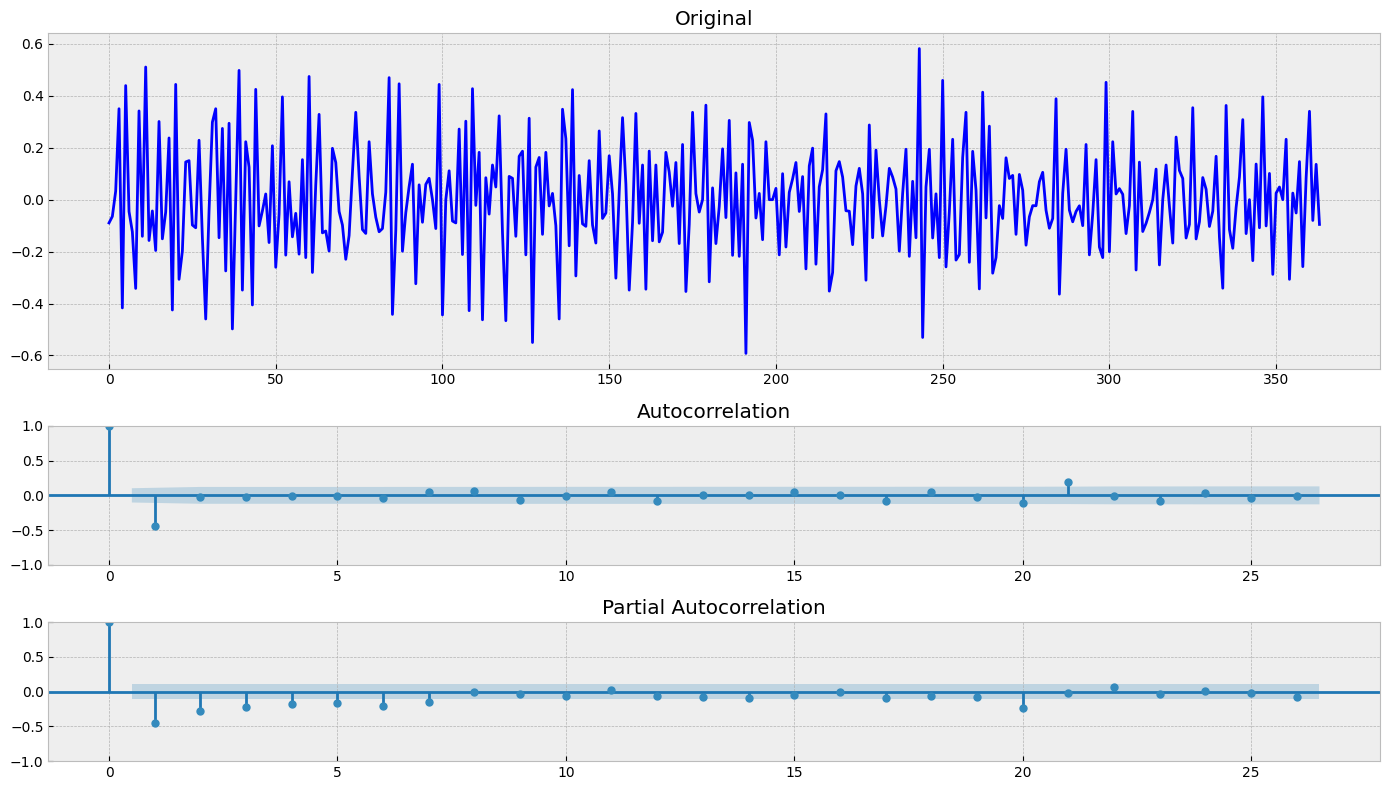

Results of Dickey-Fuller Test:
Test Statistic                -8.658575e+00
p-value                        4.892375e-14
#Lags Used                     1.700000e+01
Number of Observations Used    3.340000e+02
Critical Value (1%)           -3.450081e+00
Critical Value (5%)           -2.870233e+00
Critical Value (10%)          -2.571401e+00
dtype: float64


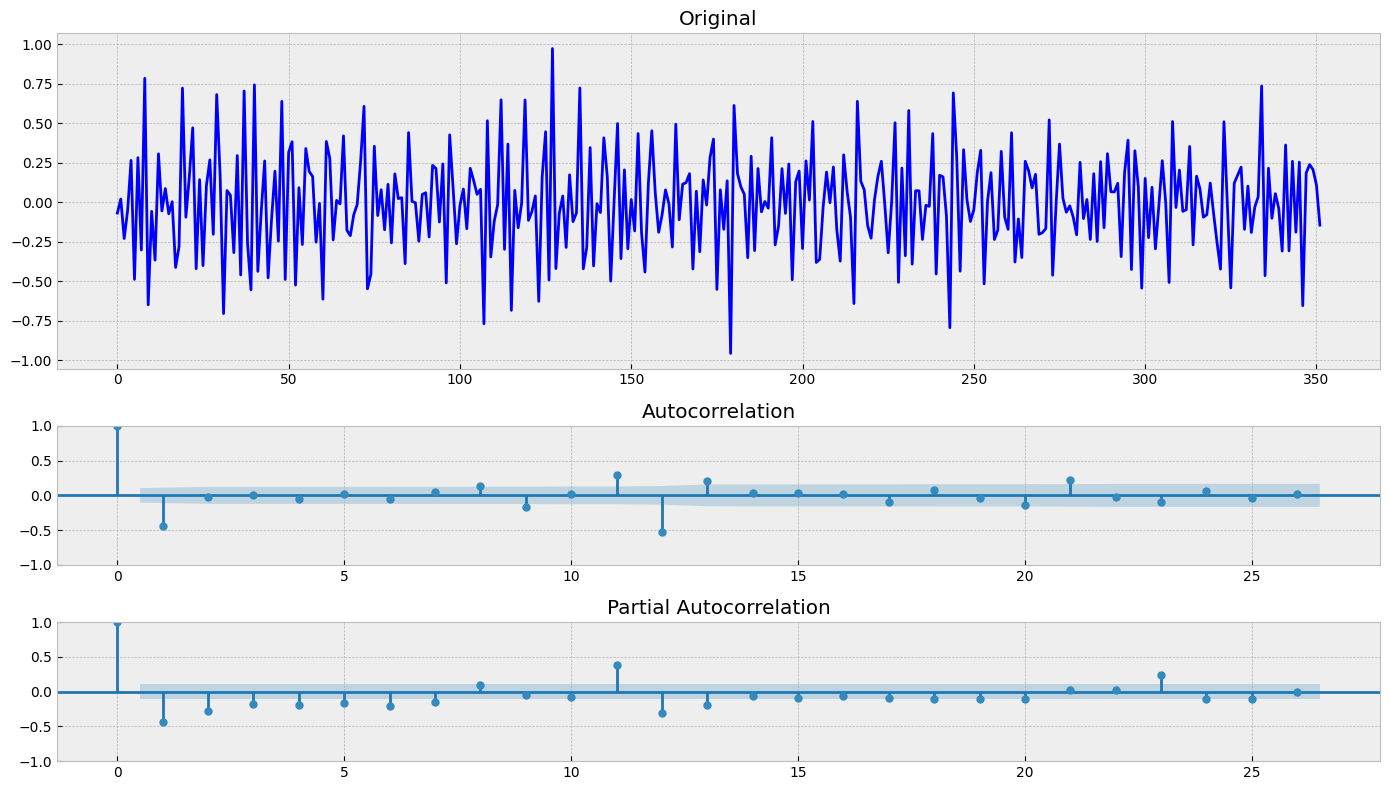

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


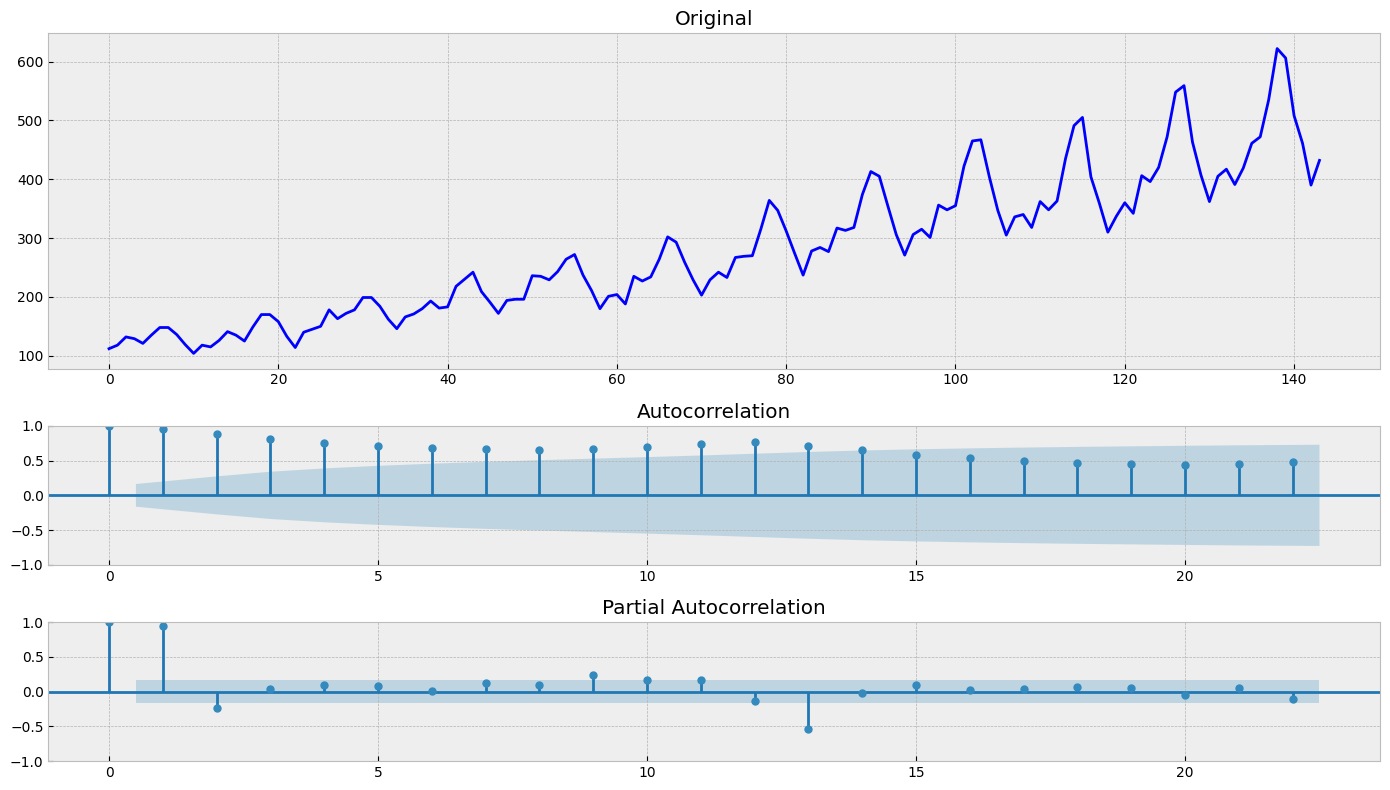

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


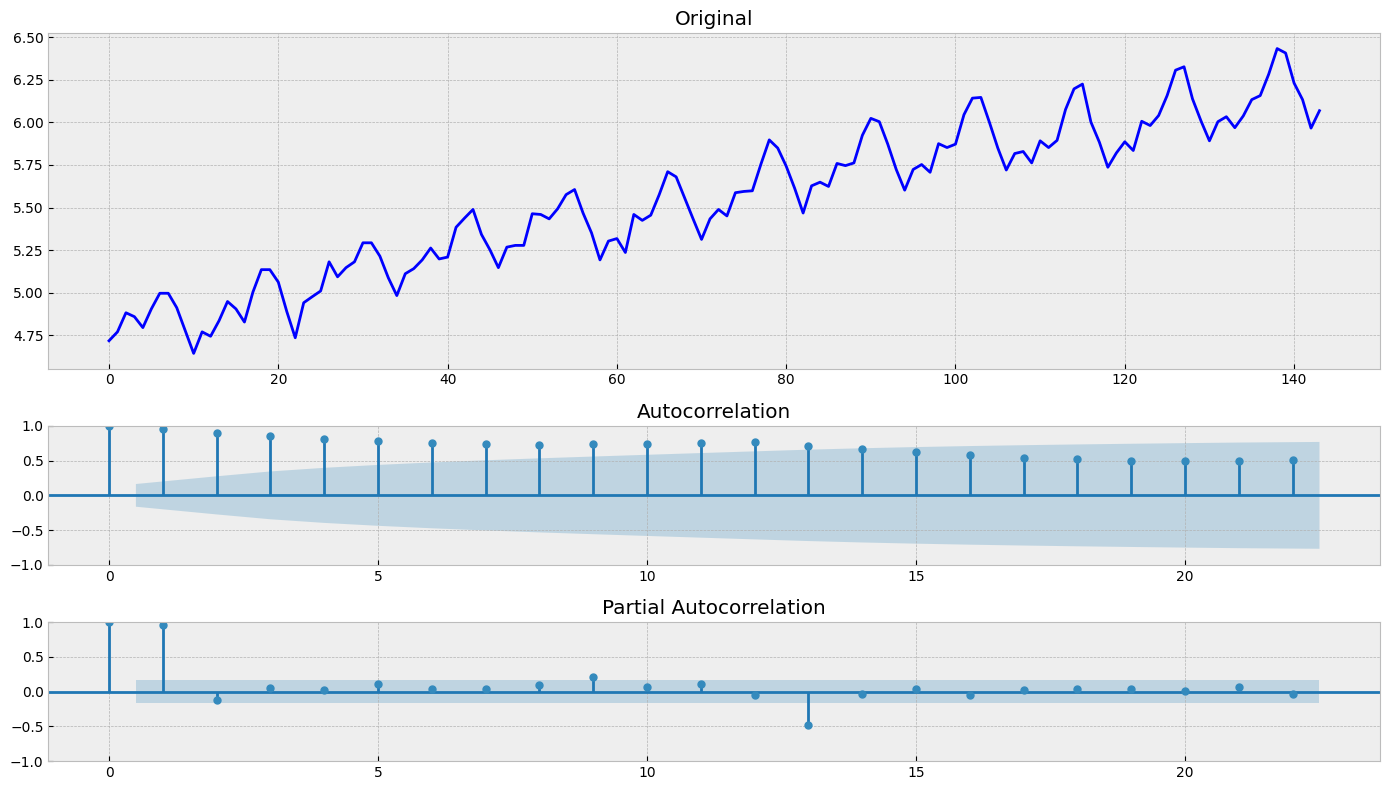

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


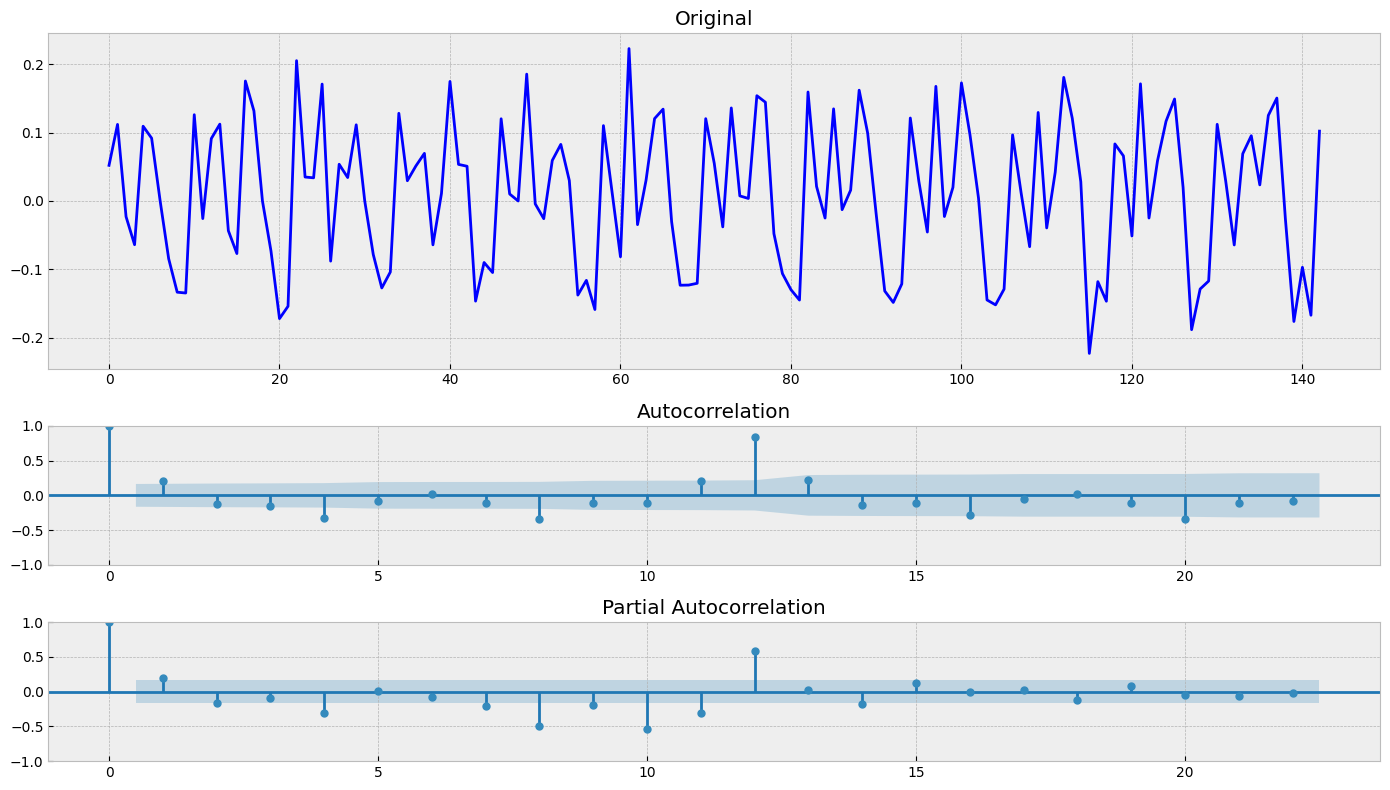

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


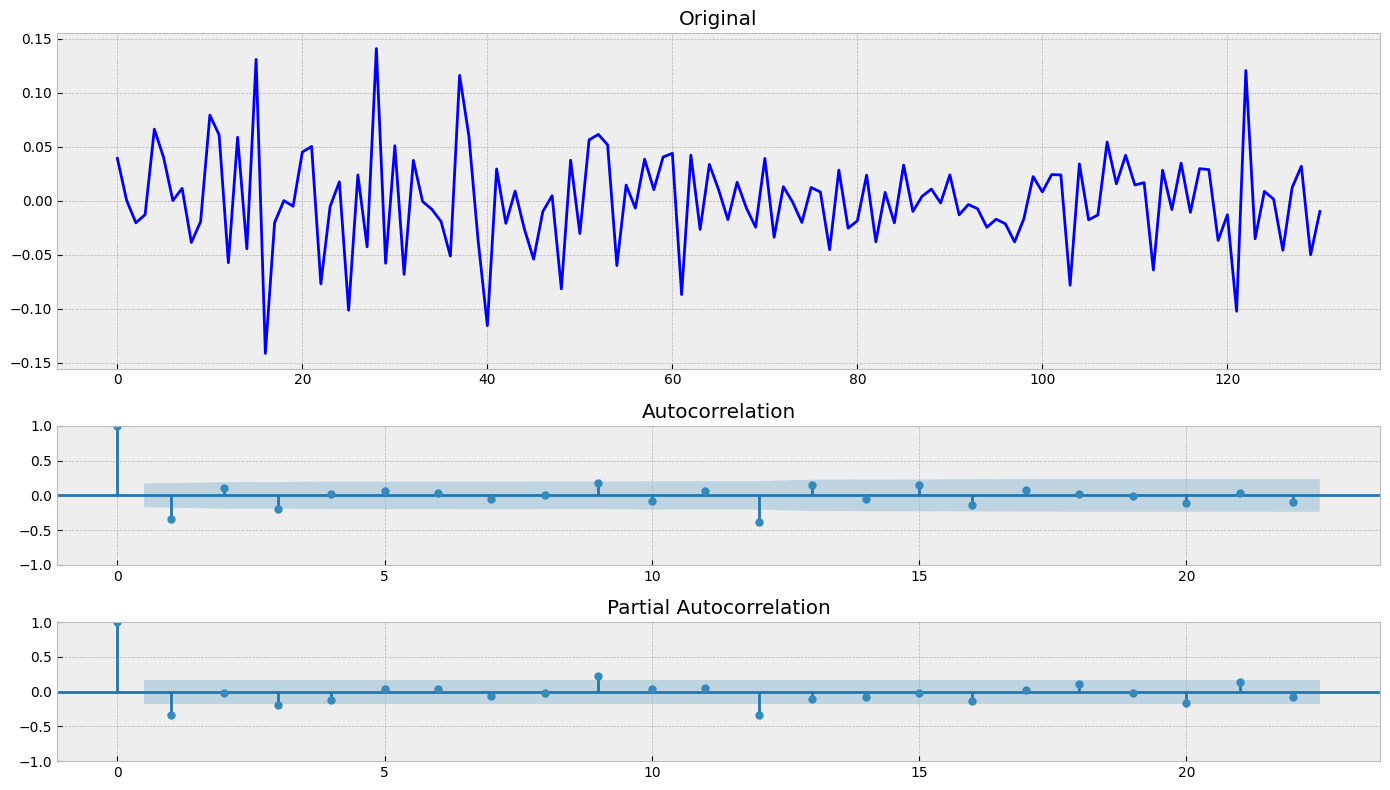

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


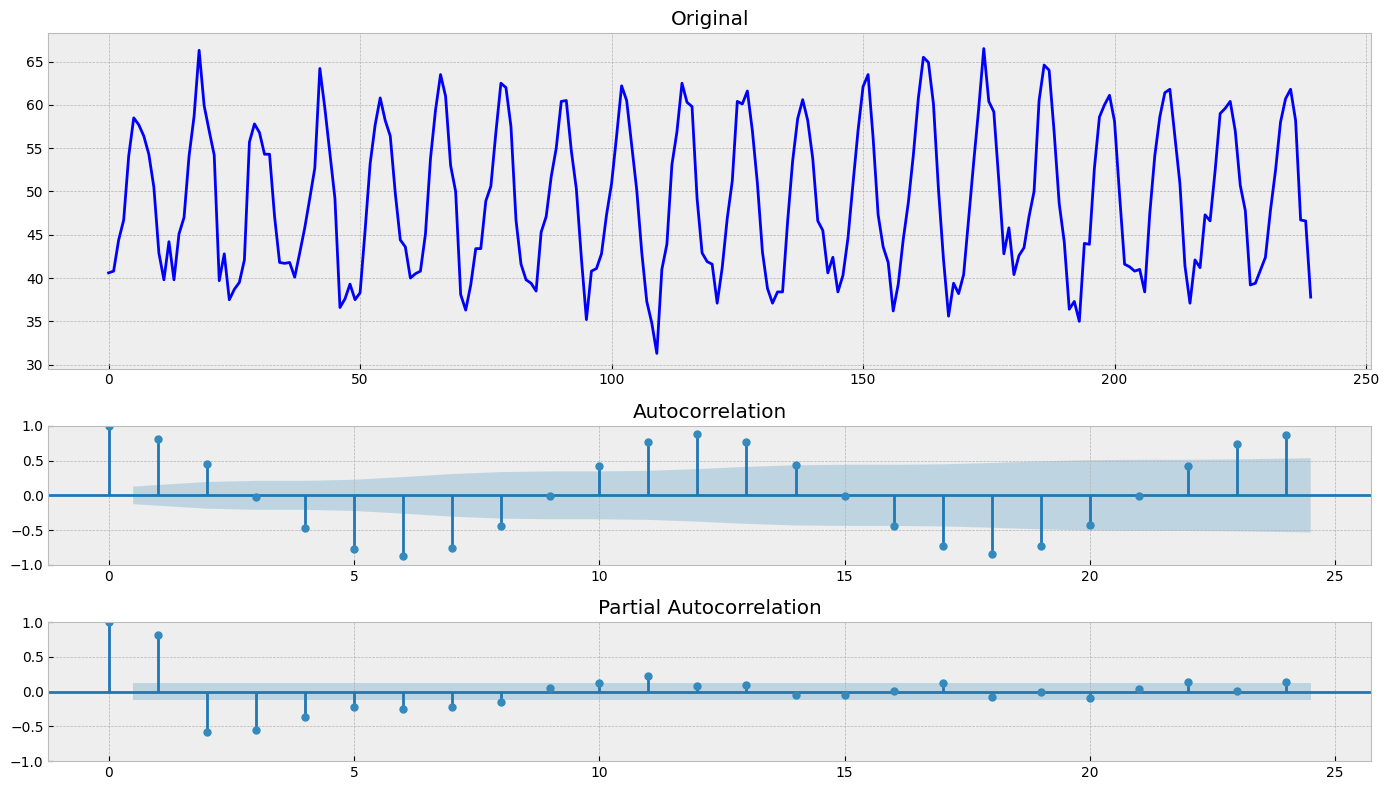

Results of Dickey-Fuller Test:
Test Statistic                  -3.760996
p-value                          0.003333
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


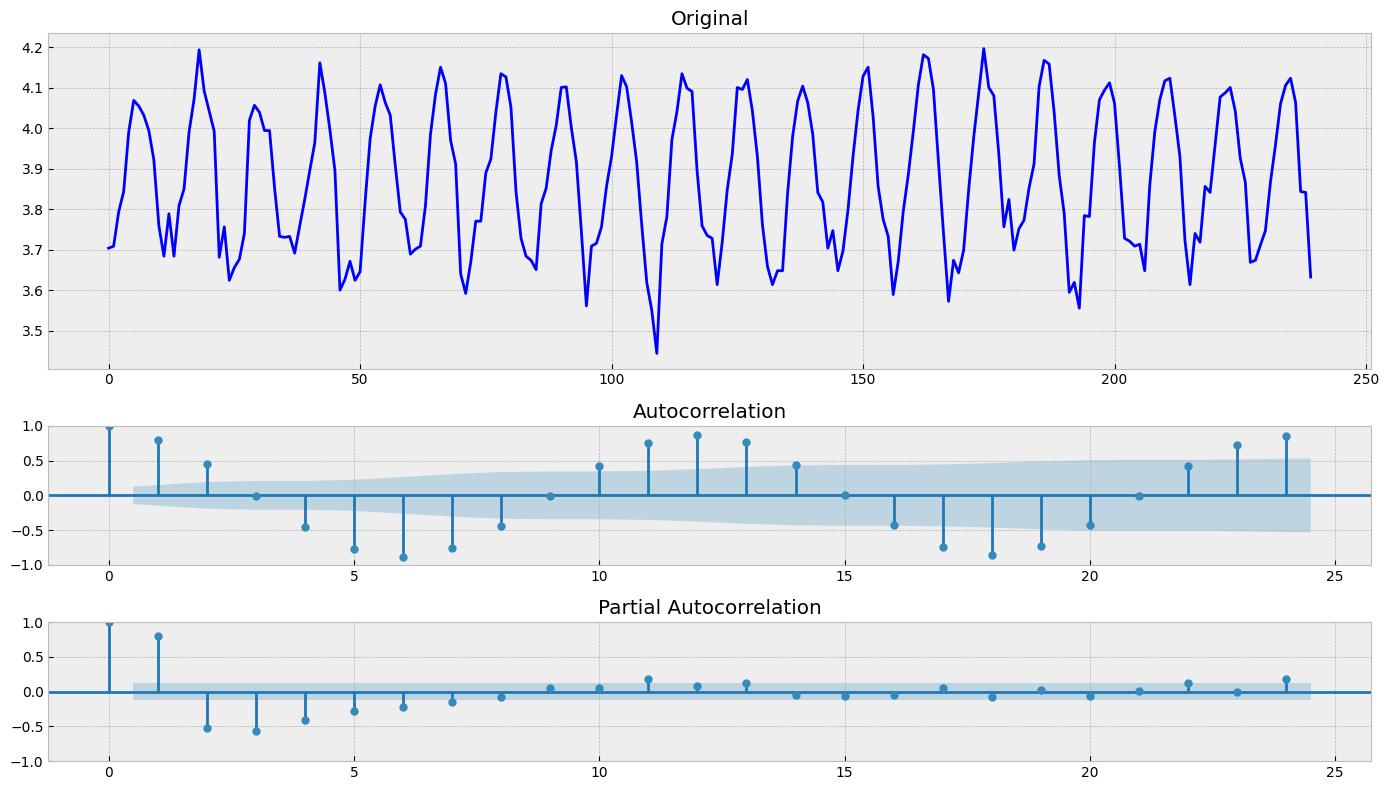

Results of Dickey-Fuller Test:
Test Statistic                -1.214226e+01
p-value                        1.640728e-22
#Lags Used                     1.100000e+01
Number of Observations Used    2.270000e+02
Critical Value (1%)           -3.459490e+00
Critical Value (5%)           -2.874358e+00
Critical Value (10%)          -2.573602e+00
dtype: float64


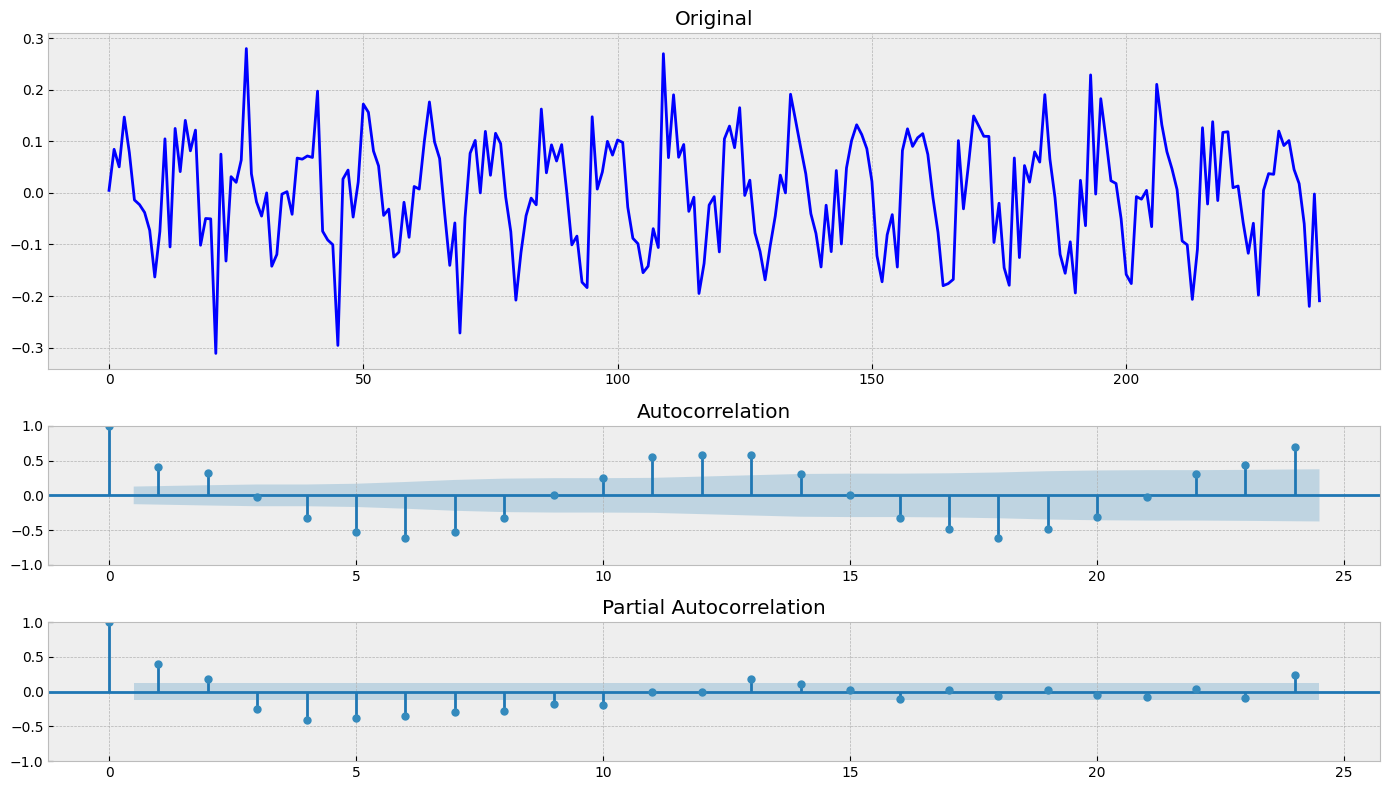

Results of Dickey-Fuller Test:
Test Statistic                -7.999033e+00
p-value                        2.361164e-12
#Lags Used                     1.500000e+01
Number of Observations Used    2.110000e+02
Critical Value (1%)           -3.461727e+00
Critical Value (5%)           -2.875337e+00
Critical Value (10%)          -2.574124e+00
dtype: float64


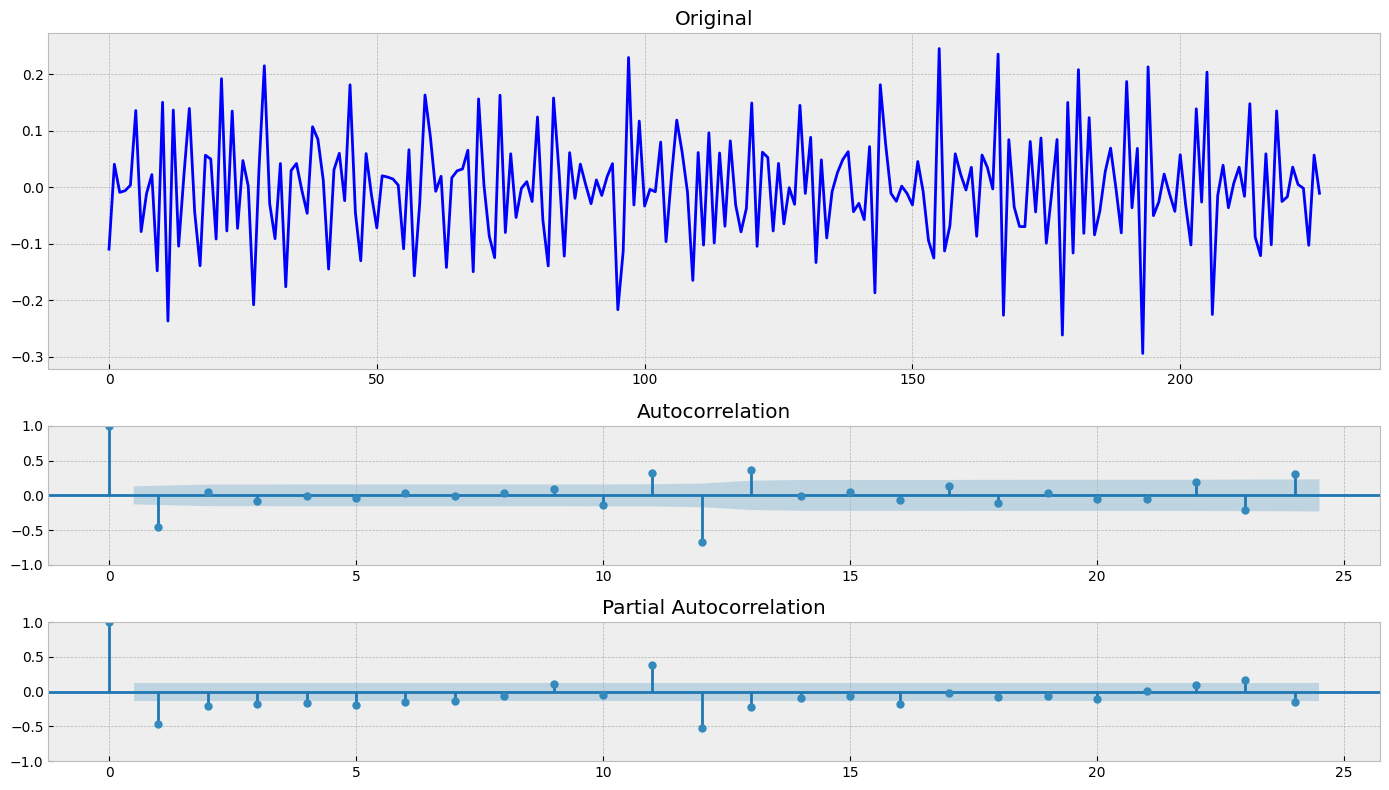

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


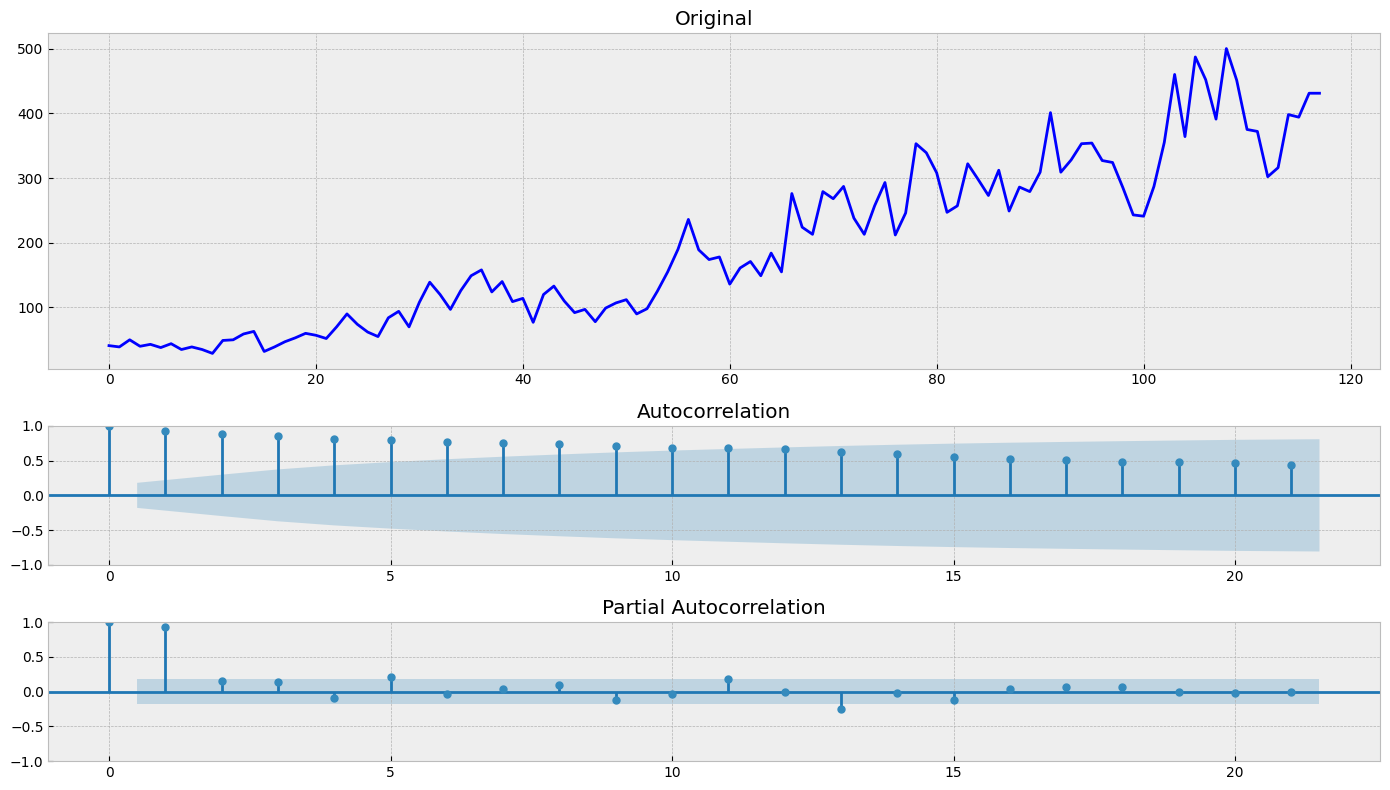

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


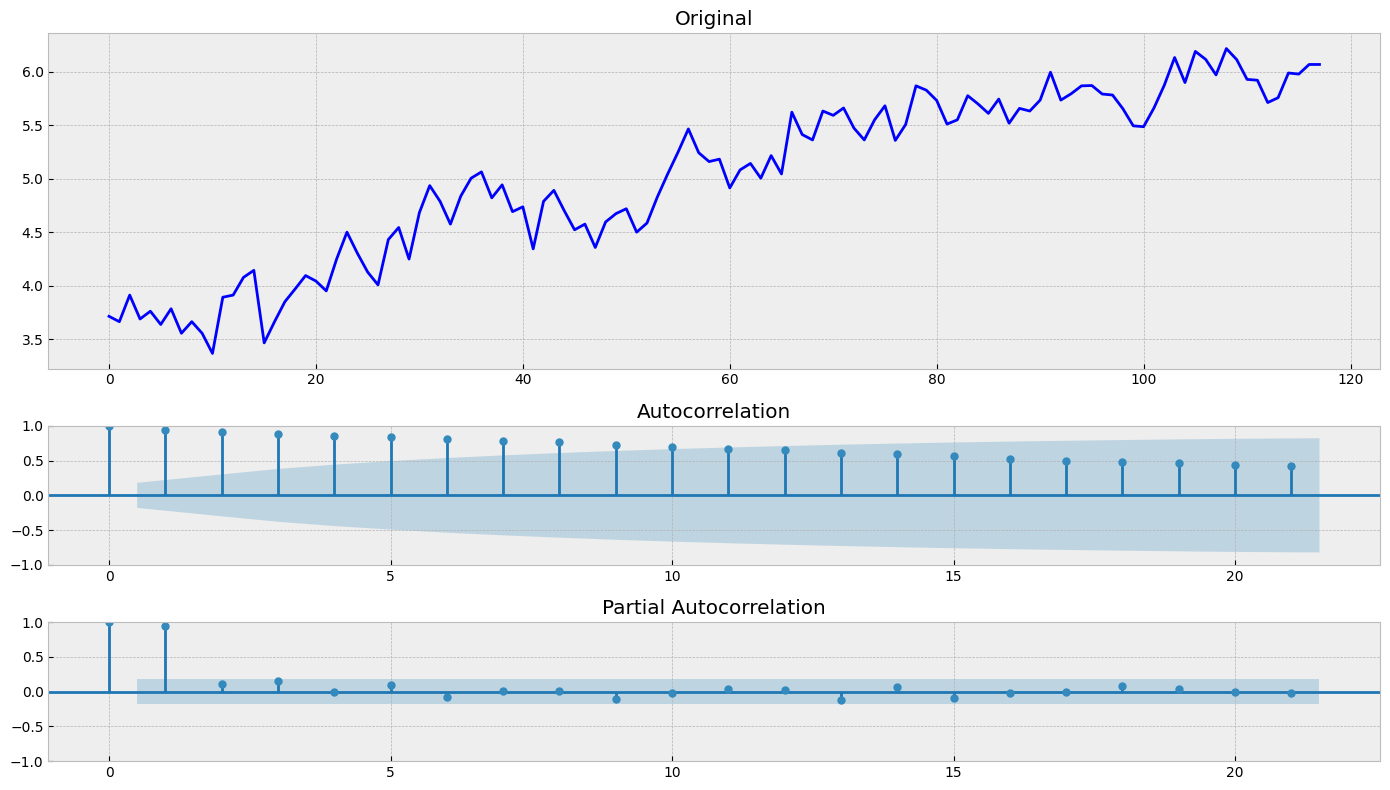

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


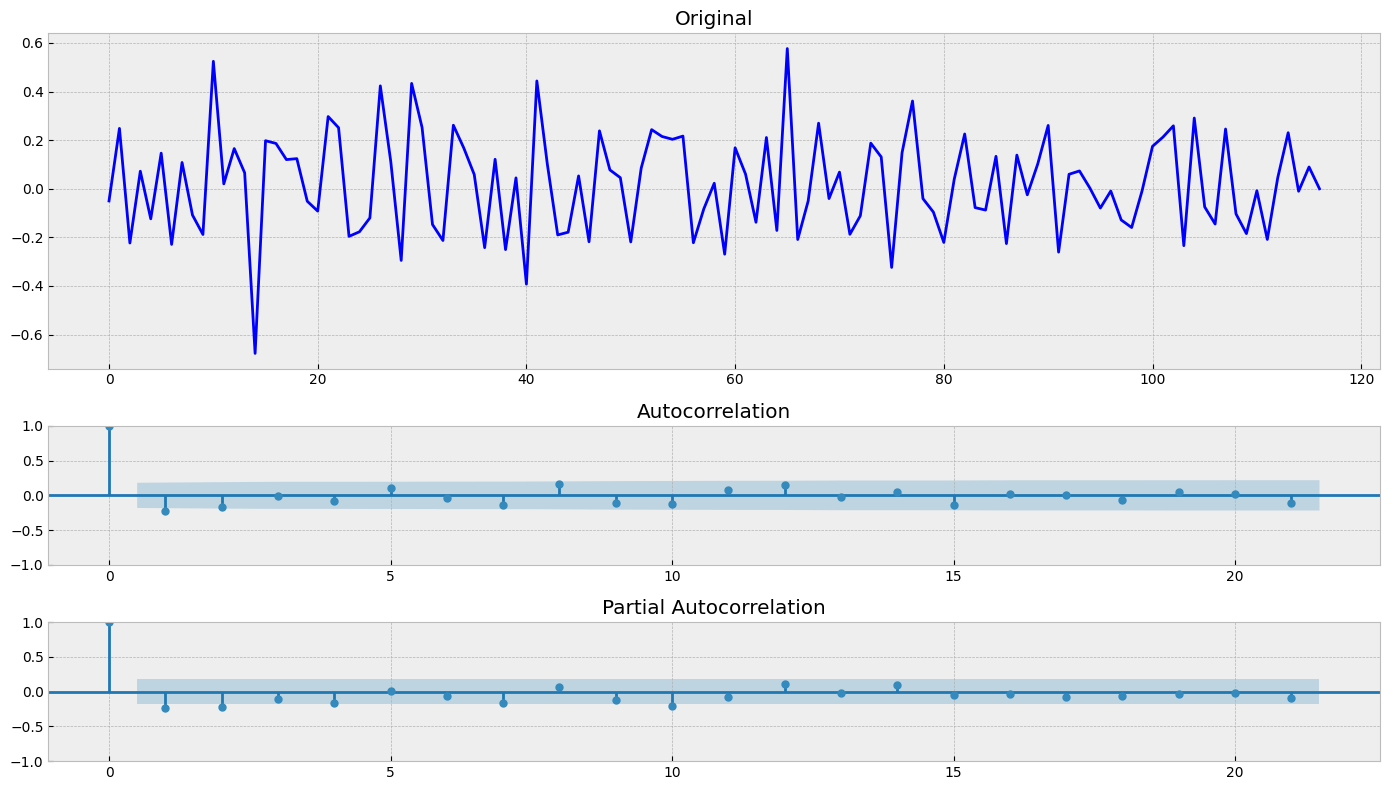

Results of Dickey-Fuller Test:
Test Statistic                 -4.232984
p-value                         0.000579
#Lags Used                     13.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64


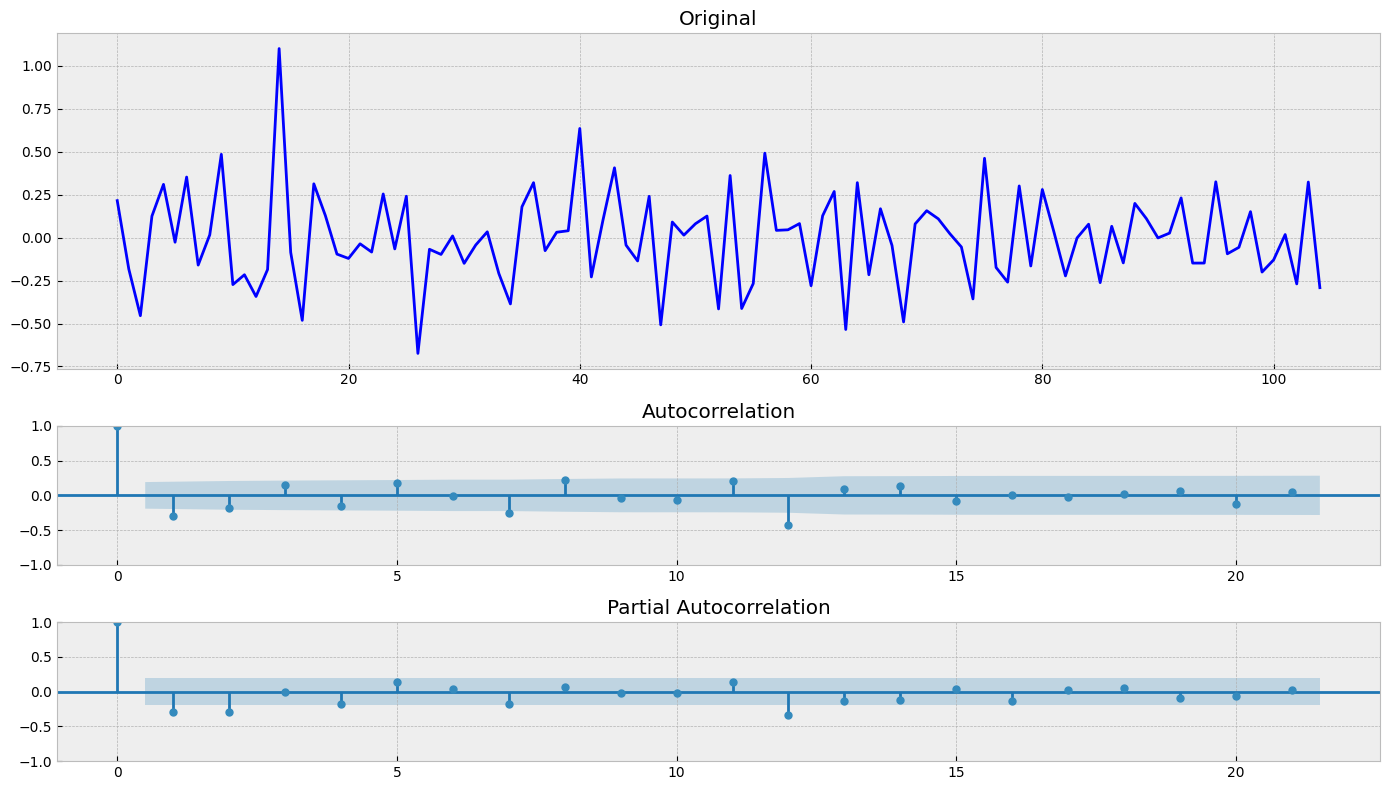

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


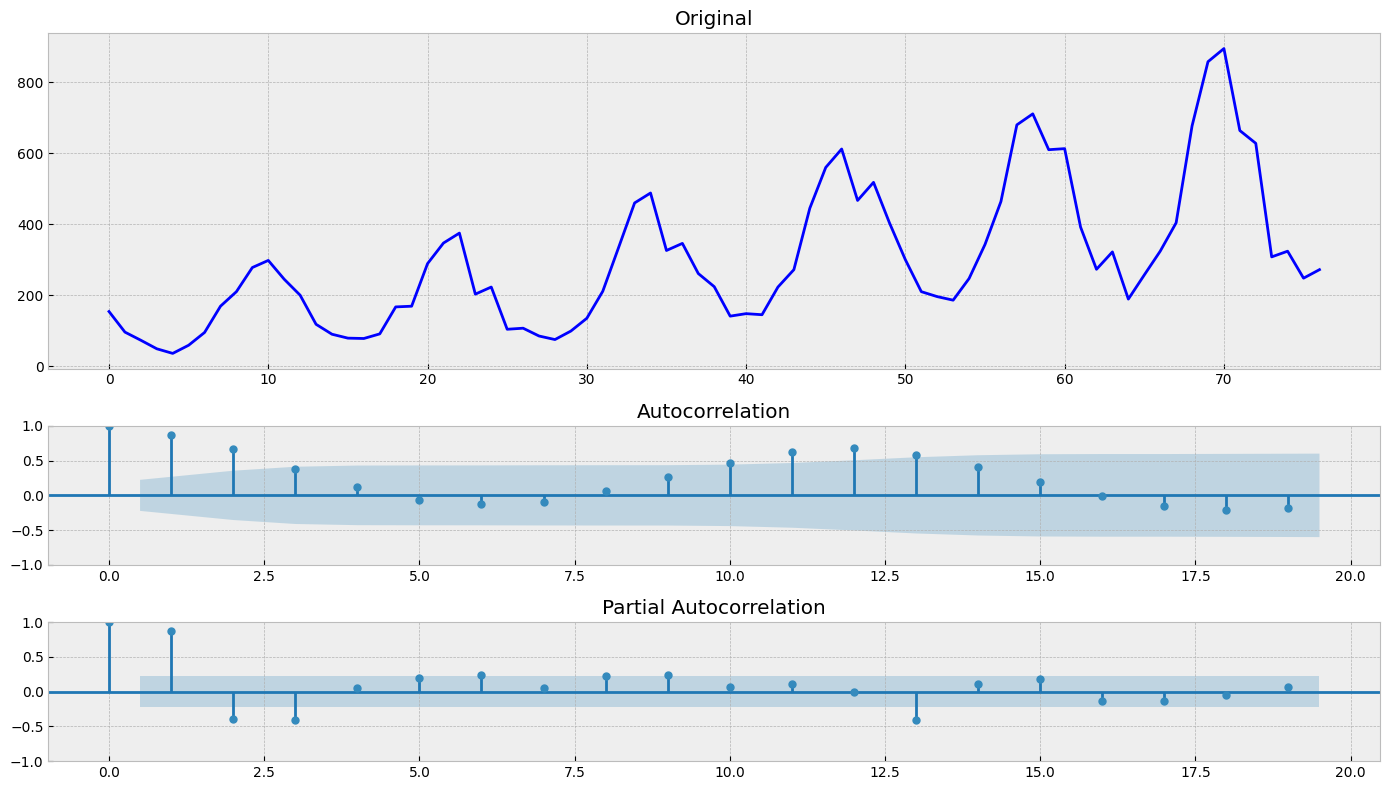

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


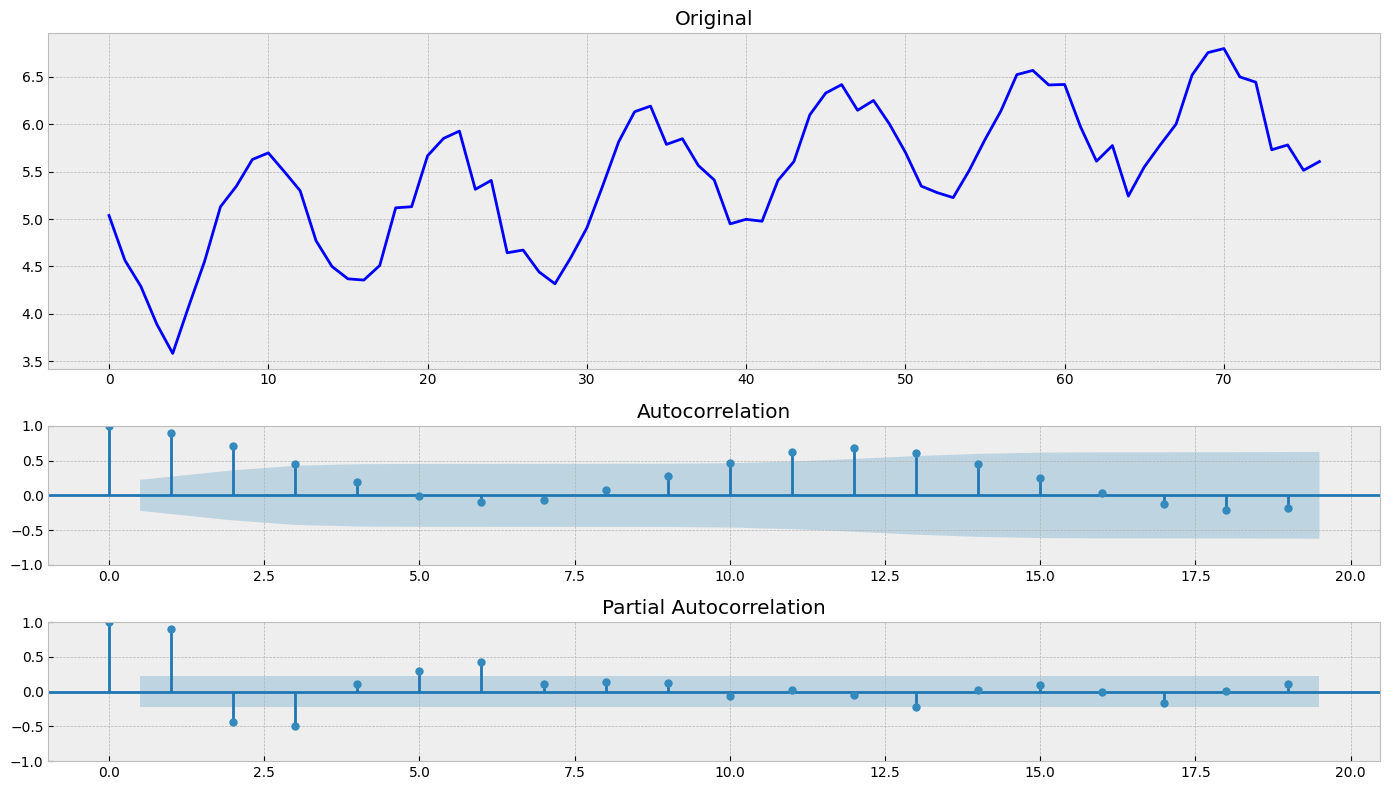

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


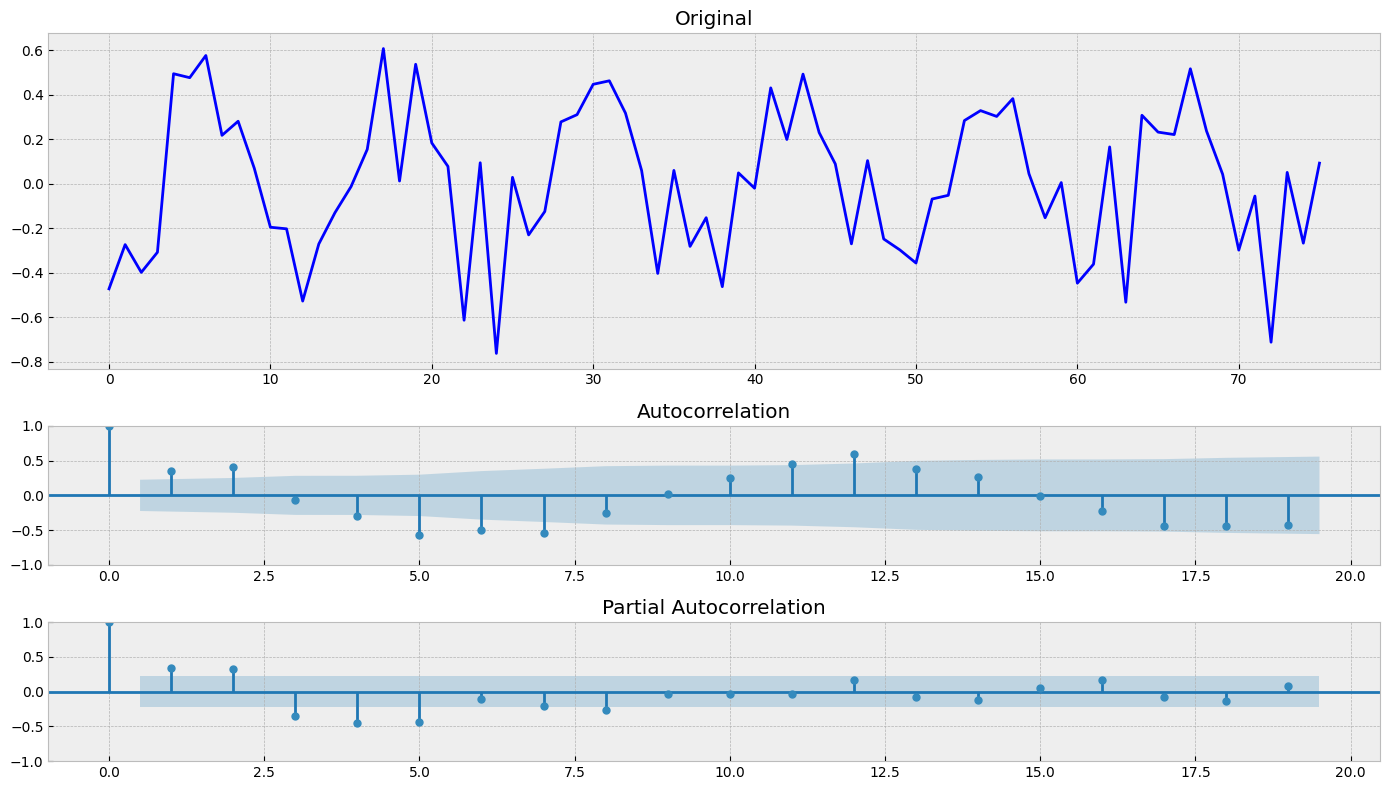

Results of Dickey-Fuller Test:
Test Statistic                 -2.316045
p-value                         0.166845
#Lags Used                     10.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


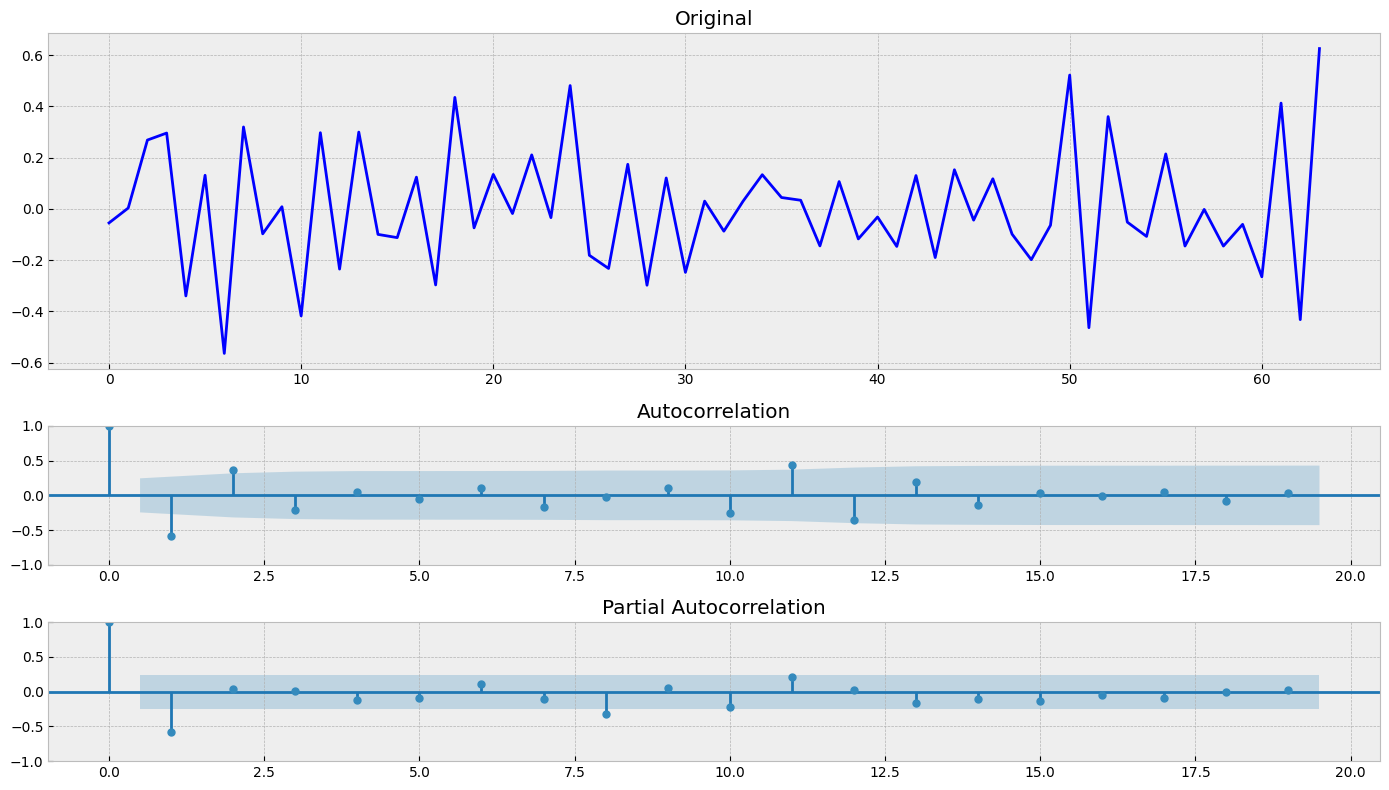

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


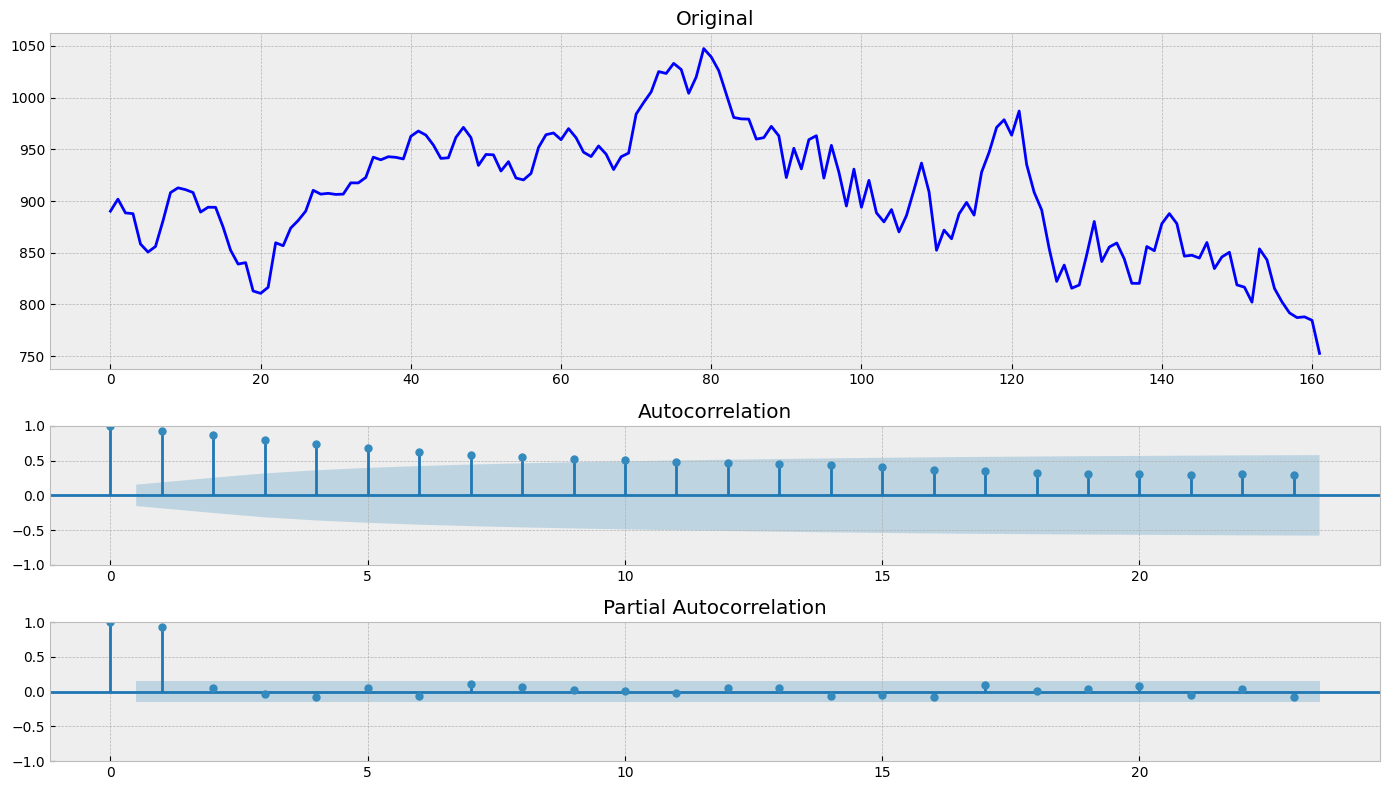

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


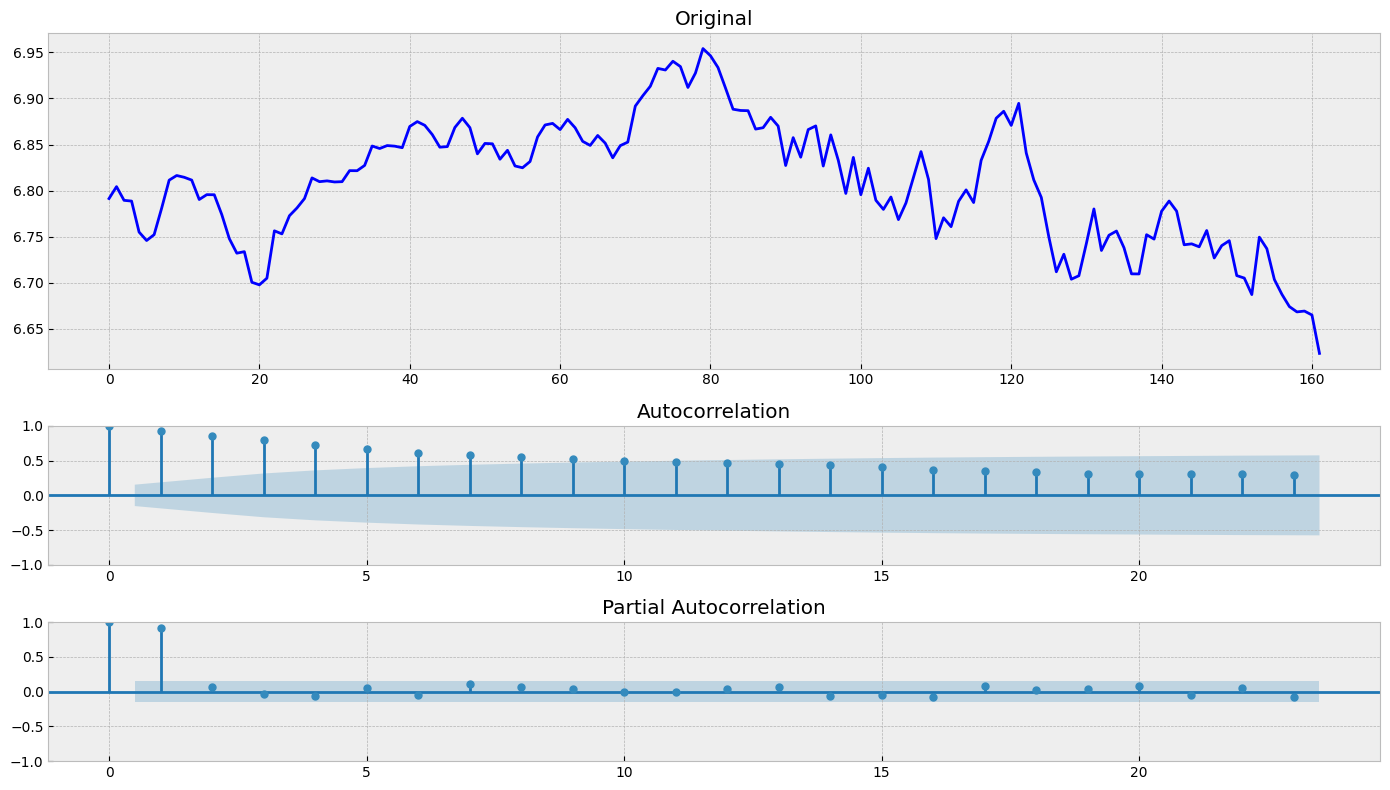

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


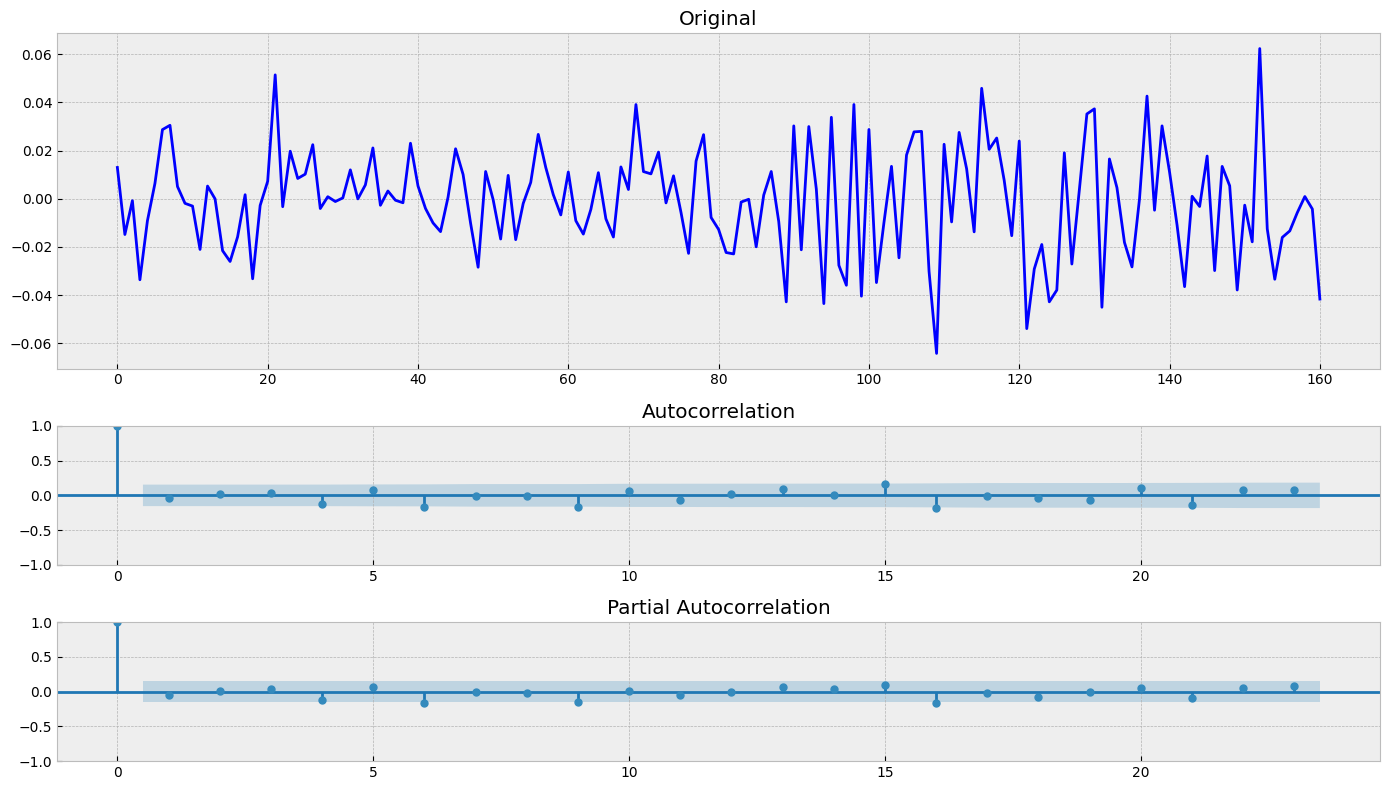

Results of Dickey-Fuller Test:
Test Statistic                  -3.433413
p-value                          0.009871
#Lags Used                      14.000000
Number of Observations Used    134.000000
Critical Value (1%)             -3.480119
Critical Value (5%)             -2.883362
Critical Value (10%)            -2.578407
dtype: float64


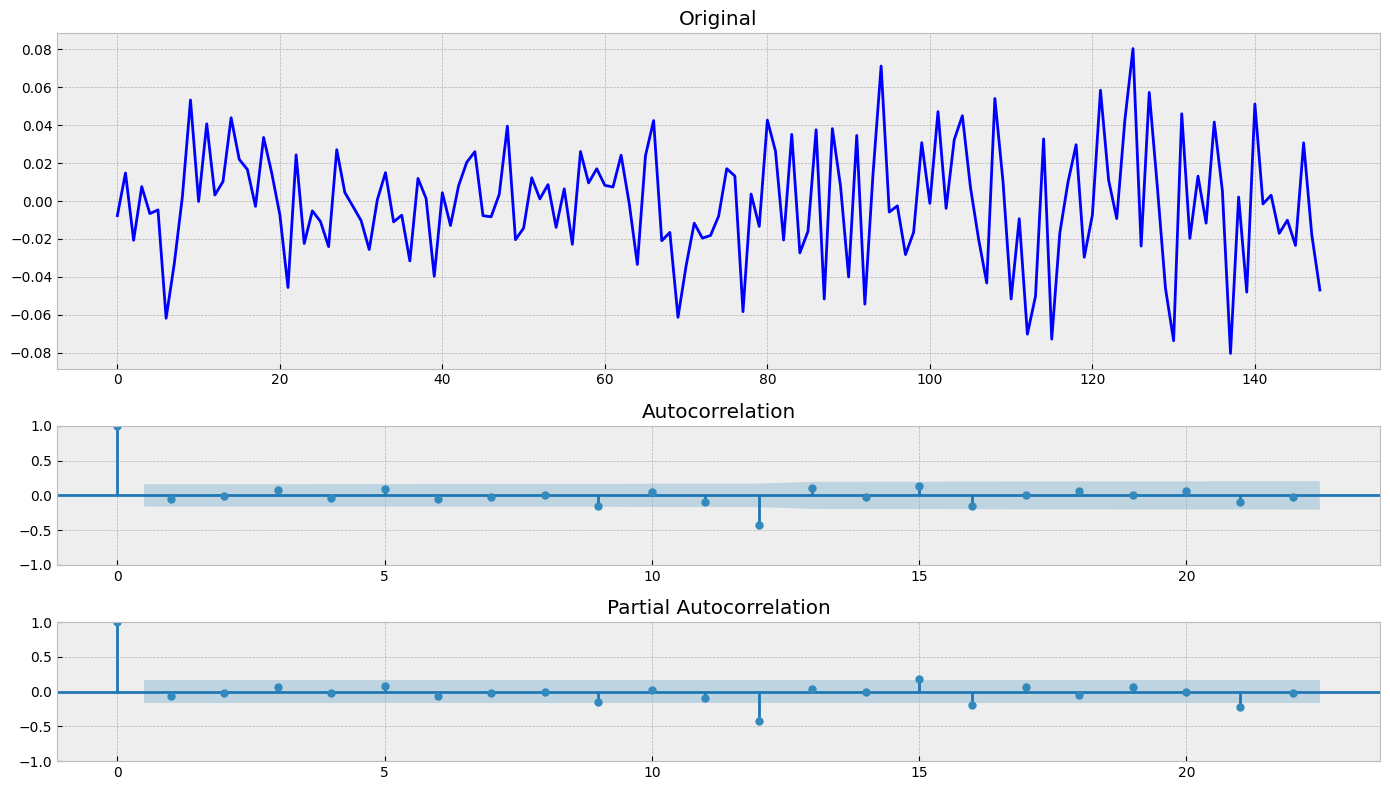

In [5]:
for file in files:
    # Загрузка данных
    df = pd.read_csv(file)
    column_name = df.columns[1] if len(df.columns) > 1 else df.columns[0]
    series = df[column_name]

    # Визуализация оригинального ряда
    tsplot(series)

    # Применение преобразования Бокса-Кокса
    series = boxcox(series, 0)
    tsplot(series)

    # Разность
    series = series[1:] - series[:-1]
    tsplot(series)

    # Сезонная разность
    try:
        series = series[12:] - series[:-12]
        tsplot(series)
    except:
        pass

Итак, большинство временных рядов стали стационарными после применения преобразований.

In [6]:
# Задание 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [7]:
# Создаем стационарный ряд (пример: рандомные значения)
np.random.seed(42)
stationary_series = np.random.randn(150)

In [8]:
# Загружаем нестационарный ряд из предоставленного файла
file_path = "/content/drive/MyDrive/international-airline-passengers.csv"
non_stationary_series = pd.read_csv(file_path)['Count']

In [9]:
# Функция для создания и оценки MA-модели
def fit_ma_model(series, order):
    model = sm.tsa.SARIMAX(series, order=(0, 0, order), enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=-1)
    return results

In [10]:
# MA-модели для стационарного и нестационарного рядов
ma_order = 1  # порядок MA

In [11]:
# MA-модель для стационарного ряда
ma_model_stationary = fit_ma_model(stationary_series, ma_order)

In [12]:
# MA-модель для нестационарного ряда
ma_model_non_stationary = fit_ma_model(non_stationary_series, ma_order)

In [13]:
# Визуализация результатов
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'MA Model for Stationary Series')

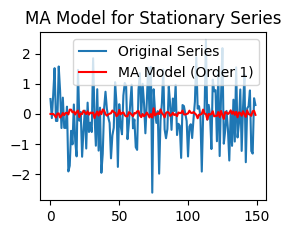

In [14]:
# Для стационарного ряда
plt.subplot(2, 2, 1)
plt.plot(stationary_series, label='Original Series')
plt.plot(ma_model_stationary.fittedvalues, color='red', label='MA Model (Order {})'.format(ma_order))
plt.legend()
plt.title('MA Model for Stationary Series')

Text(0.5, 1.0, 'MA Model for Non-Stationary Series')

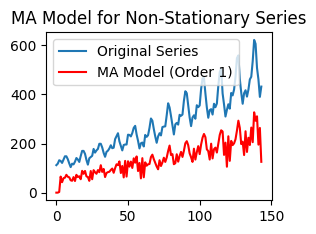

In [15]:
# Для нестационарного ряда
plt.subplot(2, 2, 2)
plt.plot(non_stationary_series, label='Original Series')
plt.plot(ma_model_non_stationary.fittedvalues, color='red', label='MA Model (Order {})'.format(ma_order))
plt.legend()
plt.title('MA Model for Non-Stationary Series')

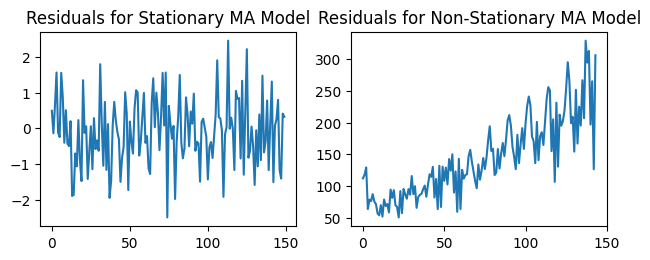

In [16]:
# Оценка качества моделей (может потребоваться другие метрики в зависимости от конкретного случая)
plt.subplot(2, 2, 3)
plt.plot(ma_model_stationary.resid, label='Residuals')
plt.title('Residuals for Stationary MA Model')

plt.subplot(2, 2, 4)
plt.plot(ma_model_non_stationary.resid, label='Residuals')
plt.title('Residuals for Non-Stationary MA Model')

plt.tight_layout()
plt.show()

**Стационарный ряд:**

Для стационарного ряда, характеризующегося постоянством статистических свойств во времени, можно ожидать, что простая MA-модель может давать хорошие результаты. Такие модели, как правило, подходят для стационарных временных рядов без ярко выраженных трендов или сезонности.

**Нестационарный ряд:**

Для нестационарных временных рядов, которые могут иметь тренды или сезонные компоненты, использование MA-модели может быть менее эффективным. Нестационарные ряды часто требуют более сложных моделей, которые учитывают тренды и сезонность, например, модели ARIMA (авторегрессионно-интегрированные скользящие средние).

**Доработка**

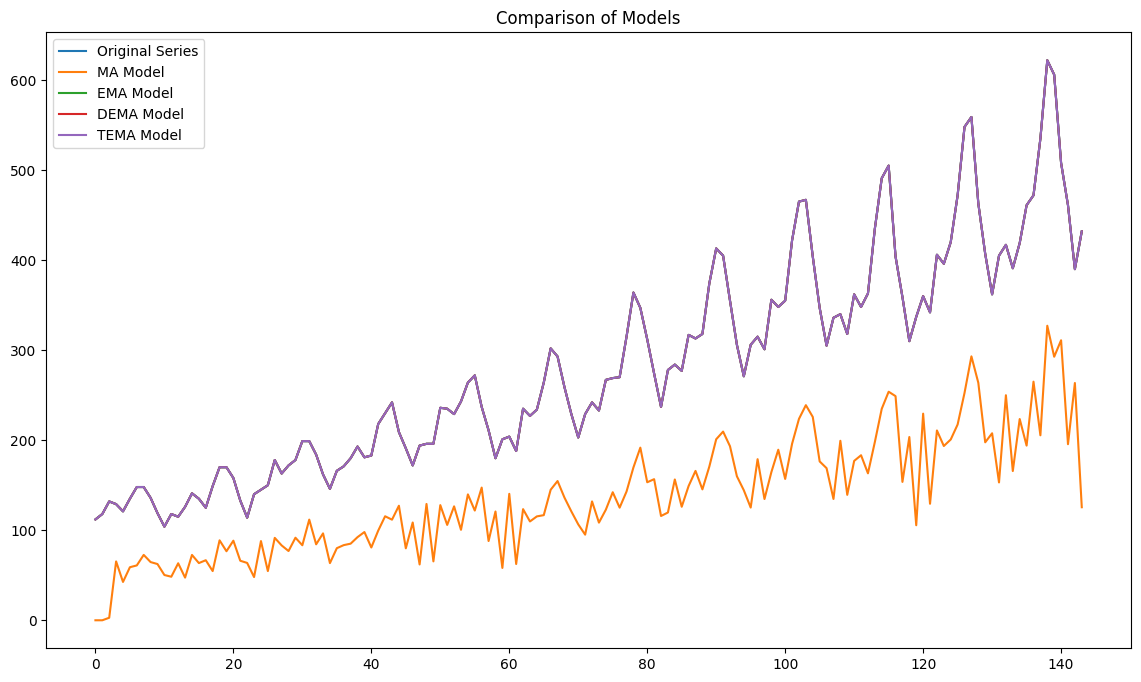

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Загружаем нестационарный ряд из предоставленного файла
file_path = "/content/drive/MyDrive/international-airline-passengers.csv"
non_stationary_series = pd.read_csv(file_path)['Count']

# Функция для создания и оценки различных моделей
def fit_model(series, model_type, order=1):
    if model_type == 'MA':
        model = sm.tsa.SARIMAX(series, order=(0, 0, order), enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit()
        return results.predict()
    elif model_type == 'EMA':
        return series.ewm(span=order, adjust=False).mean()
    elif model_type == 'DEMA':
        ema = series.ewm(span=order, adjust=False).mean()
        dema = ema.ewm(span=order, adjust=False).mean()
        return 2 * ema - dema
    elif model_type == 'TEMA':
        ema1 = series.ewm(span=order, adjust=False).mean()
        ema2 = ema1.ewm(span=order, adjust=False).mean()
        ema3 = ema2.ewm(span=order, adjust=False).mean()
        return 3 * (ema1 - ema2) + ema3
    else:
        raise ValueError("Invalid model_type. Choose 'MA', 'EMA', 'DEMA', or 'TEMA'")

# Порядок MA
ma_order = 1

# Создание и оценка различных моделей
models = ['MA', 'EMA', 'DEMA', 'TEMA']
results = {}

for model_type in models:
    results[model_type] = fit_model(non_stationary_series, model_type, ma_order)

# Визуализация результатов
plt.figure(figsize=(14, 8))

# Оригинальный ряд
plt.plot(non_stationary_series, label='Original Series')

# Результаты различных моделей
for model_type, model_values in results.items():
    plt.plot(model_values, label='{} Model'.format(model_type))

plt.legend()
plt.title('Comparison of Models')
plt.show()


Результаты анализа временных рядов с применением различных моделей показывают следующее:

**MA (Moving Average) Model:** Модель скользящего среднего позволяет учесть короткосрочные колебания и тренды в данных. Она подходит для рядов с явными циклическими компонентами.

**EMA (Exponential Moving Average) Model:** Экспоненциальное скользящее среднее предоставляет вес каждому наблюдению, уменьшая влияние старых данных. Эта модель полезна для выявления быстрых изменений в данных.

**DEMA (Double Exponential Moving Average) Model:** Двойное экспоненциальное скользящее среднее представляет собой комбинацию двух экспоненциальных средних и может быть эффективным инструментом для выделения трендов в данных.

**TEMA (Triple Exponential Moving Average) Model:** Тройное экспоненциальное скользящее среднее добавляет ещё один уровень экспоненциального сглаживания. Оно может быть полезно для более точного предсказания трендов в данных.

**Визуализация результатов позволяет сравнить, как каждая модель аппроксимирует исходный временной ряд. Выбор конкретной модели зависит от характеристик данных и требований к точности прогноза.**